In [0]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_blobs

Text(0, 0.5, 'Feature 2')

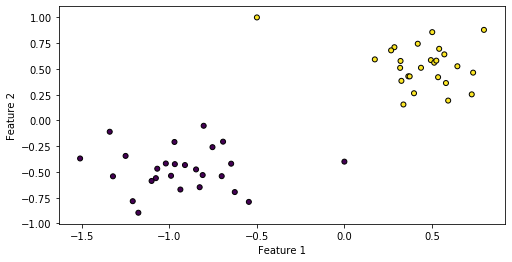

In [2]:
X, y = make_blobs(random_state=0,
                  n_samples=50, 
                  n_features=2, 
                  cluster_std=0.2,
                  centers=[(-1.0, -0.5),(0.5, 0.5)])

X = np.vstack((X, [0.0,-0.4],[-0.5,1.0]))
y = np.hstack((y, 0,1))

plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [3]:
model = LinearSVC(loss='hinge', C=1000000, random_state=0)
# モデルの訓練
model.fit(X, y)

LinearSVC(C=1000000, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)

In [4]:
# ロジスティック回帰モデルを作成
model2 = LogisticRegression(C=1.0, multi_class = 'ovr', max_iter=100, solver='liblinear',penalty='l2', random_state=0)

# モデルの訓練
model2.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [0]:
# 決定境界用の変数X_pltを作成
X_plt = np.linspace(-1.5, 1, 100)[:, np.newaxis]

# SVCの決定境界の作成
w = model.coef_[0]
b = model.intercept_[0]
decision_boundary = -w[0]/w[1] * X_plt - b/w[1]

# SVCの決定境界の上下にマージン作成
margin = 1/w[1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin

# ロジスティック回帰の決定境界
w2 = model2.coef_[0]
b2 = model2.intercept_[0]
decision_boundary2 = -w2[0]/w2[1] * X_plt - b2/w2[1]

<function matplotlib.pyplot.show>

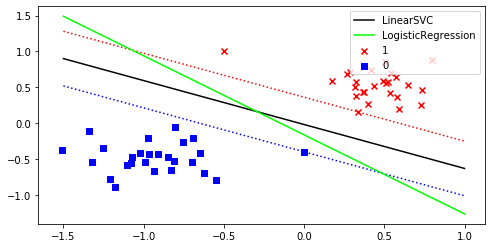

In [6]:
plt.figure(figsize=(8,4)) #プロットのサイズ指定

# 決定境界、マージンのプロット
plt.plot(X_plt, decision_boundary, linestyle = "-",  color='black', label='LinearSVC')
plt.plot(X_plt, gutter_up, linestyle = ":", color='red')
plt.plot(X_plt, gutter_down, linestyle = ":",color='blue')
plt.plot(X_plt, decision_boundary2, linestyle = "-", color='lime', label='LogisticRegression')

# 訓練データの散布図
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='r', marker='x', label='1')
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c='b', marker='s', label='0')
plt.legend(loc='best')
plt.show

全データ数: 200
削減後のデータ数(サポートベクターのみ): 77


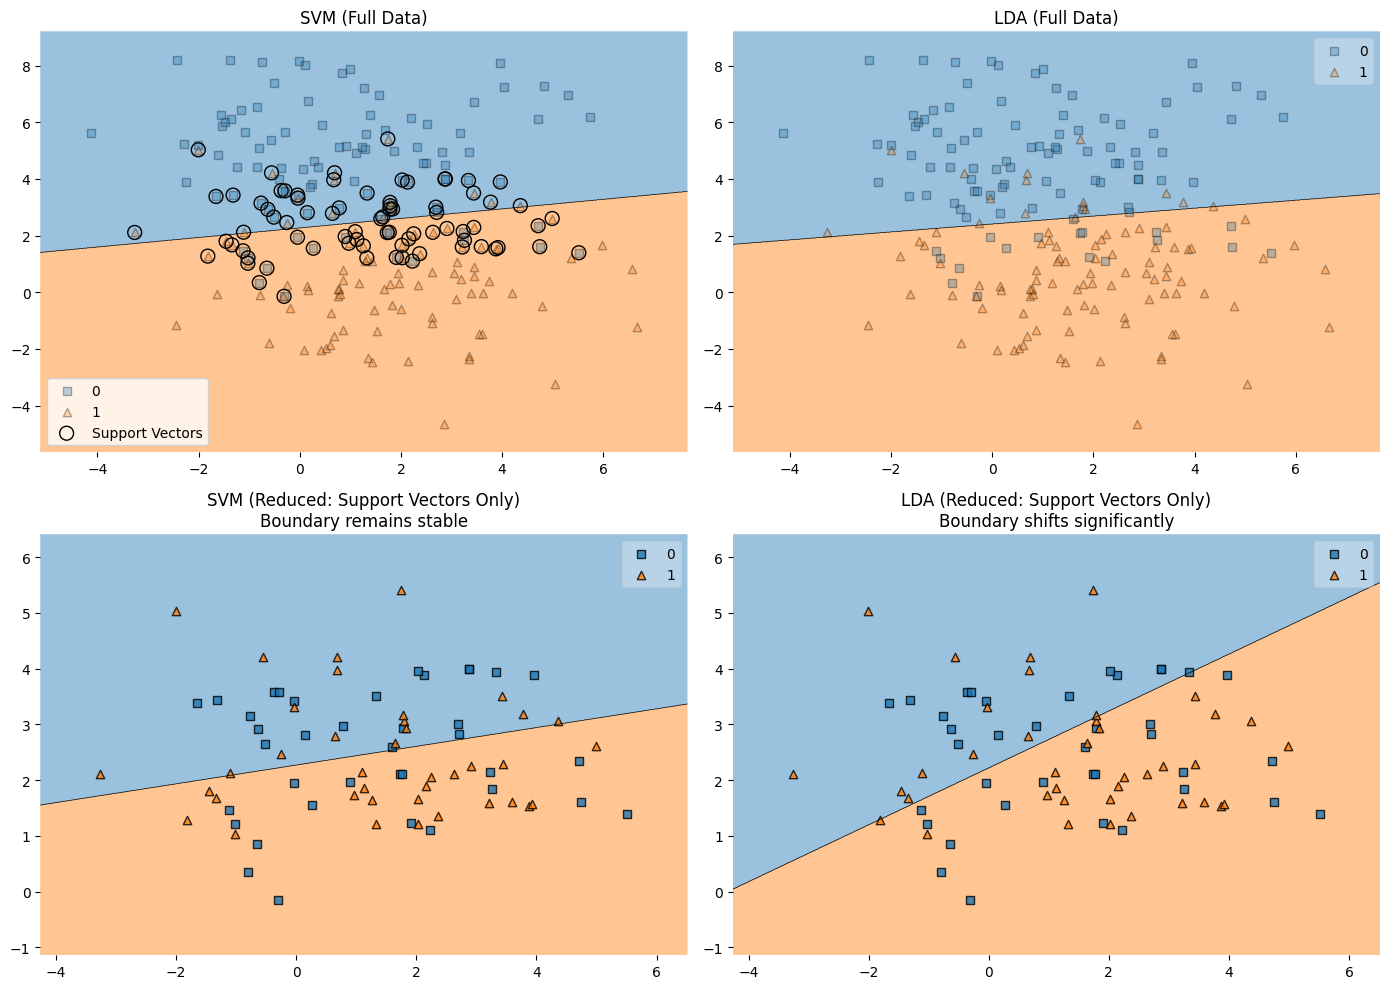

In [1]:
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_blobs
from mlxtend.plotting import plot_decision_regions

# 1. データの生成（あえて少し分散を大きくして重なりを持たせます）
X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=2.0)

# 2. 全データを使った学習
# 線形SVM (LinearSVCではなく、サポートベクターを取得しやすいSVCのlinear核を使用)
svm_full = SVC(kernel='linear', C=1.0, random_state=0)
svm_full.fit(X, y)

# 線形判別分析 (LDA)
lda_full = LinearDiscriminantAnalysis()
lda_full.fit(X, y)

# 3. データの削減（SVMのサポートベクターのみを残す）
# SVMが決定境界を決めるのに使ったデータのインデックスを取得
sv_indices = svm_full.support_
X_reduced = X[sv_indices]
y_reduced = y[sv_indices]

print(f"全データ数: {len(X)}")
print(f"削減後のデータ数(サポートベクターのみ): {len(X_reduced)}")

# 4. 削減したデータ（サポートベクターのみ）での再学習
svm_reduced = SVC(kernel='linear', C=1.0, random_state=0)
svm_reduced.fit(X_reduced, y_reduced)

lda_reduced = LinearDiscriminantAnalysis()
lda_reduced.fit(X_reduced, y_reduced)

# 5. 結果の可視化
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# --- 全データの場合 ---
# SVM (Full)
plot_decision_regions(X, y, clf=svm_full, ax=axes[0, 0],  scatter_kwargs={'alpha': 0.3})
axes[0, 0].set_title('SVM (Full Data)')
# サポートベクターを強調表示
axes[0, 0].scatter(X[sv_indices, 0], X[sv_indices, 1], s=100,
                   linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
axes[0, 0].legend()

# LDA (Full)
plot_decision_regions(X, y, clf=lda_full, ax=axes[0, 1], scatter_kwargs={'alpha': 0.3})
axes[0, 1].set_title('LDA (Full Data)')

# --- 削減データ（サポートベクターのみ）の場合 ---
# SVM (Reduced)
plot_decision_regions(X_reduced, y_reduced, clf=svm_reduced, ax=axes[1, 0])
axes[1, 0].set_title('SVM (Reduced: Support Vectors Only)\nBoundary remains stable')

# LDA (Reduced)
plot_decision_regions(X_reduced, y_reduced, clf=lda_reduced, ax=axes[1, 1])
axes[1, 1].set_title('LDA (Reduced: Support Vectors Only)\nBoundary shifts significantly')

plt.tight_layout()
plt.show()